In [1]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [2]:
from pathlib import Path

import torch
from PIL import Image
from transformers import AutoModelForZeroShotObjectDetection, AutoProcessor

from segmenter_api.utils.image import draw_bboxes

In [3]:
model_id = "IDEA-Research/grounding-dino-base"
device = "cuda"
processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

In [4]:
image_path = Path("data/multiple_products.png")

In [5]:
image = Image.open(image_path)
text_labels = ["cosmetics"]

inputs = processor(images=image, text=text_labels, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]],
)

In [12]:
result = results[0]
boxes = result["boxes"].tolist()
labels = result["labels"].tolist()

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api/.venv/lib/python3.11/site-packages/transformers/models/grounding_dino/processing_grounding_dino.py:95: FutureWarning: The key `labels` is will return integer ids in `GroundingDinoProcessor.post_process_grounded_object_detection` output since v4.51.0. Use `text_labels` instead to retrieve string object names.
  warnings.warn(self.message, FutureWarning)


AttributeError: 'list' object has no attribute 'tolist'

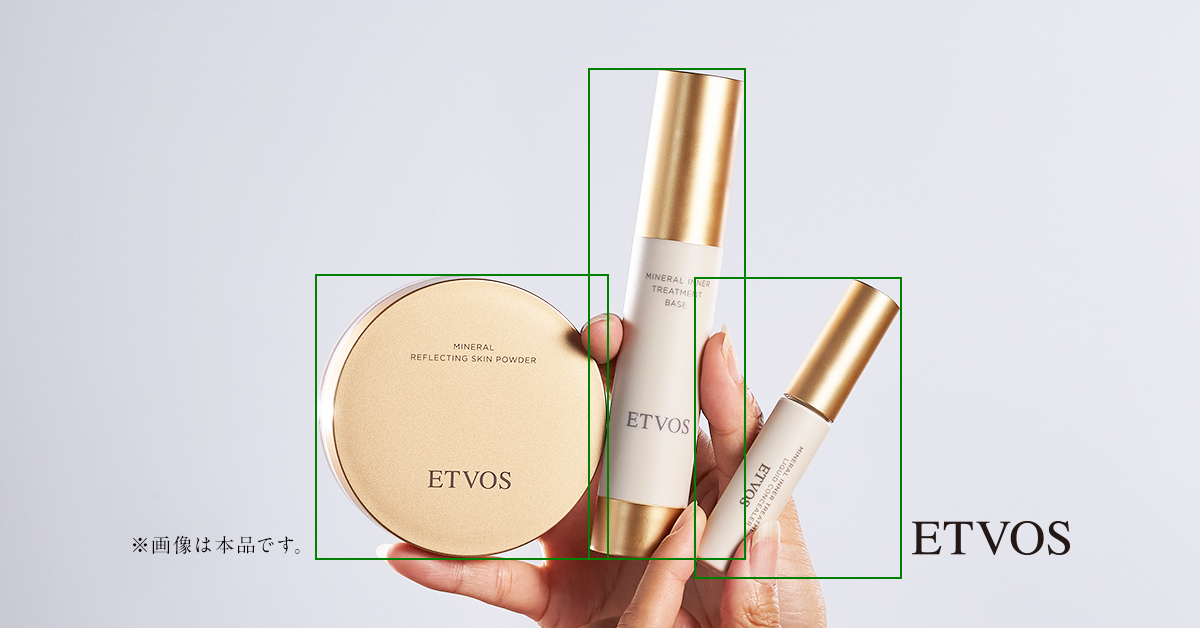

In [8]:
draw_bboxes(image=image, bboxes=boxes)